In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

SyntaxError: invalid syntax (<ipython-input-47-b10ef860e670>, line 16)

In [6]:
from sklearn.datasets import load_boston
names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
boston = load_boston()
dataset = pd.DataFrame(data=np.c_[boston['data'], boston['target']], columns=names )

In [7]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [8]:
boston['data'].shape

(506, 13)

In [9]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Как видим, пропущенных значений нет

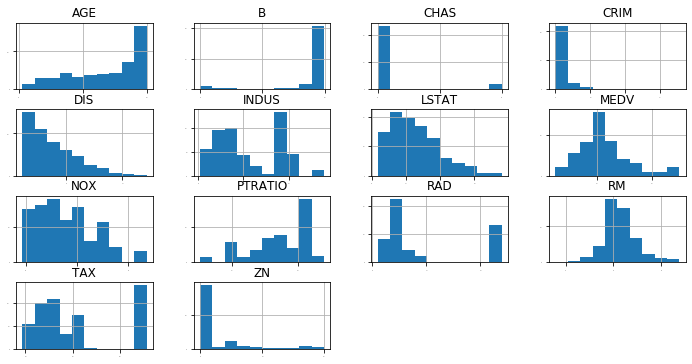

In [10]:
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,6))
pyplot.show()

Построив все гистограммы, можем заметить, что есть выбросы для признака MEDV(распределен нормально), есть выбросы и для других признаков

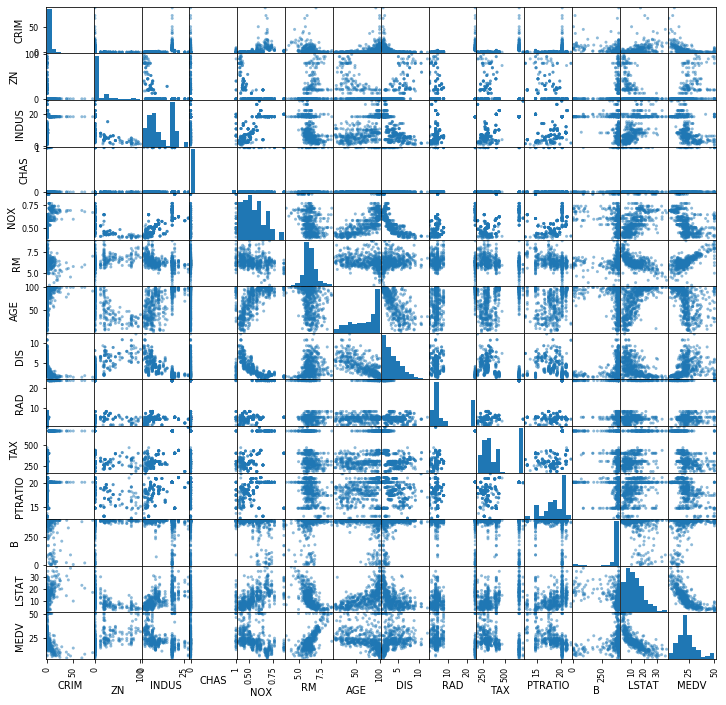

In [11]:
scatter_matrix(dataset, figsize=(12,12))
pyplot.show()

Для некоторых признаков можно проследить линейную зависимость (DIS, NOX), тогда как некоторые признаки разбросаны хаотично (AGE, PTRATIO)

In [12]:
dfx = pd.DataFrame(boston.data, columns = boston.feature_names)
dfy = pd.DataFrame(boston.target, columns = ['target'])
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.25, random_state=42)

In [15]:
linR = LinearRegression()
linR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
linR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
linR.score(X_test,y_test)

0.6844267283527059

In [19]:
predictions = linR.predict(X_test)
error = y_test - predictions

In [20]:
predictions

array([[28.83885359],
       [36.00783288],
       [15.08324755],
       [25.23090886],
       [18.87864064],
       [23.21398327],
       [17.5931124 ],
       [14.30508093],
       [23.05438985],
       [20.62008346],
       [24.78514683],
       [18.66833668],
       [-6.9788951 ],
       [21.83575737],
       [19.20898992],
       [26.2868054 ],
       [20.54379176],
       [ 5.65713224],
       [40.42358065],
       [17.64146116],
       [27.32258958],
       [30.05056174],
       [11.15013704],
       [24.11530393],
       [17.89145648],
       [15.79348591],
       [22.94743453],
       [14.2586068 ],
       [22.26731194],
       [19.24709013],
       [22.26897546],
       [25.24344002],
       [25.69165643],
       [17.98759507],
       [16.70286649],
       [17.11631225],
       [31.19643534],
       [20.17835831],
       [23.71828436],
       [24.79196868],
       [13.94575895],
       [32.00389982],
       [42.53869791],
       [17.44523722],
       [27.15354457],
       [17

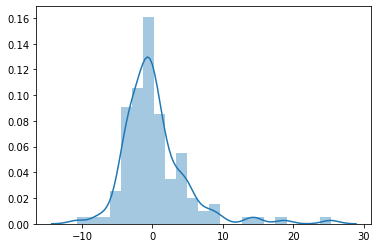

In [21]:
sns.distplot(error)

In [22]:
oness = np.ones((506,1),dtype = int)
dfone = pd.DataFrame(oness, columns = ['ones'])

In [23]:
dfxnew = dfone.join(dfx)

In [24]:
dfxnew.head()

,ones,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [37]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_train)

In [38]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.748087259862344
Adjusted R^2: 0.7391150252820987
MAE: 3.3662875144521207
MSE: 22.340057992152875
RMSE: 4.7265270539956585


In [39]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [40]:
reg.fit(X_train, y_train)
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.748087259862344
Adjusted R^2: 0.7391150252820987
MAE: 3.3662875144521207
MSE: 22.340057992152875
RMSE: 4.7265270539956585


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Как видим, MSE одинакова для двух моделей.
Теперь попробуем придумать способ для получения лучшей метрики, чем уже было получено. (Бонусное задание)

In [48]:
conda install -c anaconda py-xgboost

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\User\Anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          12 KB  anaconda
    ca-certificates-2019.8.28  |                0         165 KB  anaconda
    certifi-2019.9.11          |           py37_0         155 KB  anaconda
    conda-4.8.0                |           py37_0         3.0 MB  anaconda
    libxgboost-0.90            |                1         3.9 MB  anaconda
    openssl-1.1.1d             |       he774522_2         5.7 MB  anaconda
    py-xgboost-0.90            |           py37_1          80 KB  anaconda
    ------------------------------------------------------------
                                           Total:        13.0 MB

The following NEW packages will be INSTALLED:




==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [ ]:
reg = XGBRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)

In [ ]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Как видим, MSE получилось около двух, что значительно лучше и меньше, чем для модели линейной регрессии и случайного леса.